In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [ ]:
data=pd.read_csv('/content/data/car_data.csv')
print('Data Loaded Successfully')
data.head(10)

Data Loaded Successfully


,Horsepower,Weight,Engine_Size,Price
0,130,3504,2.5,20000
1,165,3693,3.0,25000
2,150,3436,2.8,23000
3,140,3449,2.2,21000
4,198,4341,3.8,32000
5,220,4354,4.0,35000
6,215,4732,4.5,37000
7,225,4380,4.6,39000
8,190,3850,3.3,31000
9,170,3560,2.9,27000


In [ ]:
X=data[['Horsepower','Weight','Engine_Size']].values
y=data['Price'].values
X=tf.constant(X,dtype=tf.float32)
y=tf.constant(y,dtype=tf.float32)
#print('Feature Tensor Shape',x.shape)
#print('label Tensor Shape',y.shape)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'), #Rectified Linear Unit (relu)
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1)
                           ])

model.compile(optimizer='adam',loss='mae',metrics=['mae'])
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
history=model.fit(X,y,epochs=200,verbose=0)


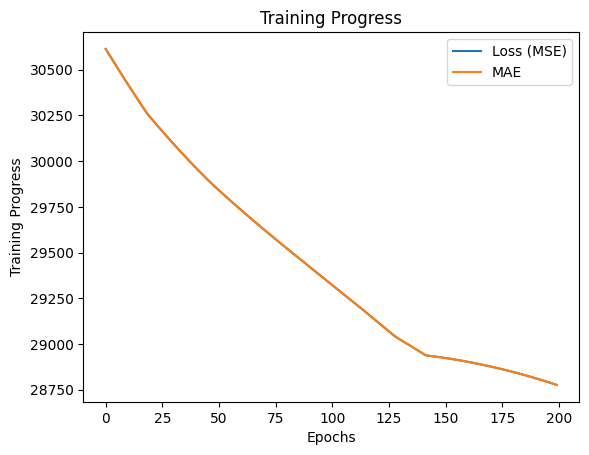

In [ ]:
plt.plot(history.history['loss'],label='Loss (MSE)')
plt.plot(history.history['mae'],label='MAE')
plt.title('Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Training Progress')
plt.legend()
plt.show()

In [ ]:
test_sample=np.array([[160,3550,2.5]])
prediction=model.predict(test_sample)
print('Predicted Price',prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted Price 205.68593


**Example A:**
We are going to use 2 layers
optimizer we are going to use SGD
We are going to use without Normalization

**Example B:**
We are going to use 3 layers
optimizer we are going to use Adam
We are going to use without Normalization

**Example C:**
We are going to use 2 layers
optimizer we are going to use SGD
We are going to use with Normalization and standardizatio

In [ ]:
from sklearn import model_selection
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [ ]:
insurance_data=pd.read_csv('/content/sample_data/insurance_data.csv')
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [ ]:
insurance_data_one_hot=pd.get_dummies(insurance_data)
insurance_data_one_hot.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,True,False,False
5,31,25.740,0,3756.62160,True,False,True,False,False,True,False


In [ ]:
x=insurance_data_one_hot.drop('charges',axis=1)
y=insurance_data_one_hot['charges']
#

In [ ]:
print('Features are')
x.head()

Features are


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,True
1,18,33.770,1,False,True,True,False,False,True,False
2,28,33.000,3,False,True,True,False,False,True,False
3,33,22.705,0,False,True,True,False,True,False,False
4,32,28.880,0,False,True,True,False,True,False,False


In [ ]:
print('Charges')
y.head()

Charges


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
x_train,x_test,y_train,ytest=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(1)
])

In [ ]:
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

In [ ]:
history_model1=insurance_model.fit(x_train,y_train,epochs=500,verbose=0)

In [ ]:
insurance_model.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - loss: 7909.5664 - mae: 7909.5664


[7909.56640625, 7909.56640625]

Text(0.5, 1.0, 'Loss vs Epochs')

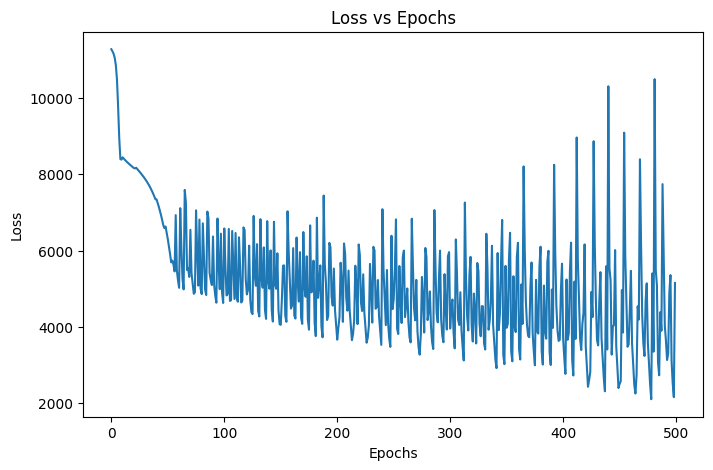

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history_model1.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")

In [ ]:
Exercise B

SyntaxError: invalid syntax (ipython-input-4136944556.py, line 1)

In [ ]:
tf.random.set_seed(42)
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(200),    #100 is the neurons dense in this layer
    tf.keras.layers.Dense(20),     #10 is the neurons in this layer
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

history_model2=insurance_model_2.fit(x_train,y_train,epochs=500,verbose=0)

In [ ]:
insurance_model_2.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 7454.8232 - mae: 7454.8232


[7454.8232421875, 7454.8232421875]

In [ ]:
insurance_model_2_loss,insurance_model_2_mae=insurance_model_2.evaluate(x_test,y_test)
print("Loss:",insurance_model_2_loss)
print("MAE:",insurance_model_2_mae)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 7454.8232 - mae: 7454.8232
Loss: 7454.8232421875
MAE: 7454.8232421875


In [ ]:
insurance_model_2_loss=insurance_model_2.evaluate(x_test,y_test)
print("Loss",insurance_model_2_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 7454.8232 - mae: 7454.8232
Loss [7454.8232421875, 7454.8232421875]


Text(0.5, 1.0, 'Loss vs Epochs')

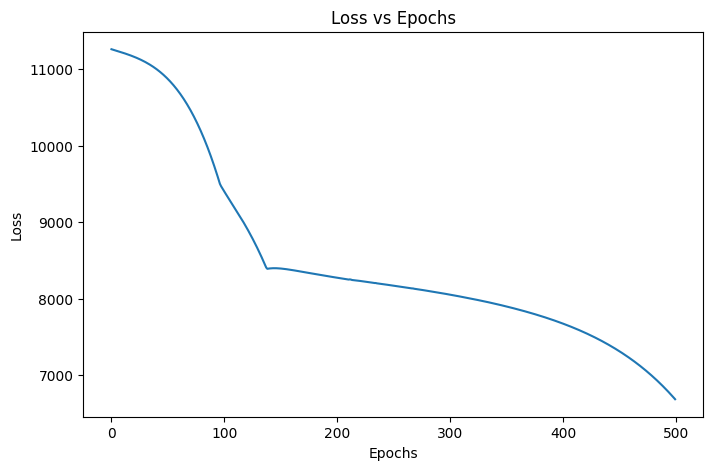

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history_model2.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")

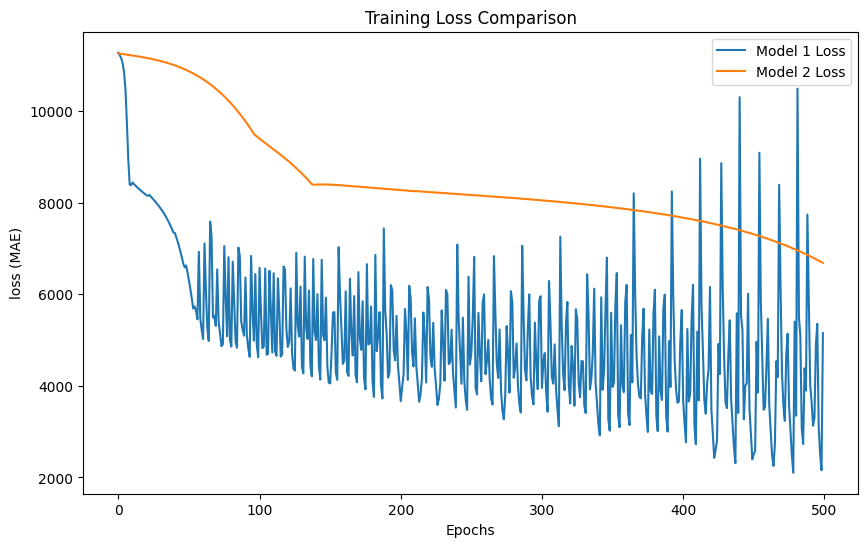

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history_model1.history['loss'],label='Model 1 Loss')
plt.plot(history_model2.history['loss'],label='Model 2 Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('loss (MAE)')
plt.legend()
plt.show()

Exercise C

In [ ]:
insurance_data=pd.read_csv('/content/sample_data/insurance_data.csv')
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

In [ ]:
x=insurance_data.drop("charges",axis=1)
y=insurance_data["charges"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
ct.fit(x_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [ ]:
x_train_normal=ct.transform(x_train)
x_test_normal=ct.transform(x_test)

In [ ]:
#original data
x_train


,age,sex,bmi,children,smoker,region
5,31,female,25.740,0,no,southeast
2,28,male,33.000,3,no,southeast
4,32,male,28.880,0,no,northwest
3,33,male,22.705,0,no,northwest


In [ ]:
#Normalized data
x_train_normal

array([[0.6       , 0.2948033 , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        ],
       [0.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 1.        ],
       [0.8       , 0.59980573, 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.        ]])

In [ ]:
print("x-Train Shape",x_train.shape)
print("x-Train Normal Shape",x_train_normal.shape)

x-Train Shape (4, 6)
x-Train Normal Shape (4, 8)


In [ ]:
tf.random.set_seed(42)
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

history_model3=insurance_model_3.fit(x_train_normal,y_train,epochs=500,verbose=0)

In [ ]:
insurance_model_3.evaluate(x_test_normal,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 8602.4834 - mae: 8602.4834


[8602.4833984375, 8602.4833984375]

In [ ]:
insurance_model_3_loss,insurance_model_3_mae=insurance_model_3.evaluate(x_test_normal,y_test)

print("Loss:",insurance_model_2_loss)
print("MAE:",insurance_model_2_mae)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8602.4834 - mae: 8602.4834
Loss: [7454.8232421875, 7454.8232421875]
MAE: 7454.8232421875


Text(0.5, 1.0, 'Loss vs Epochs')

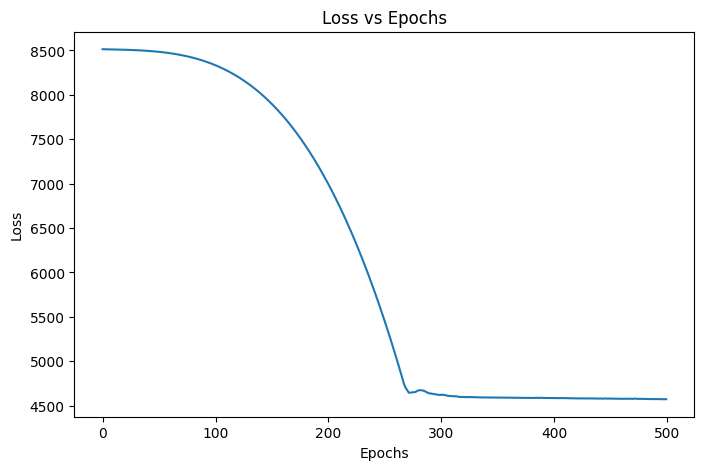

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history_model3.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")


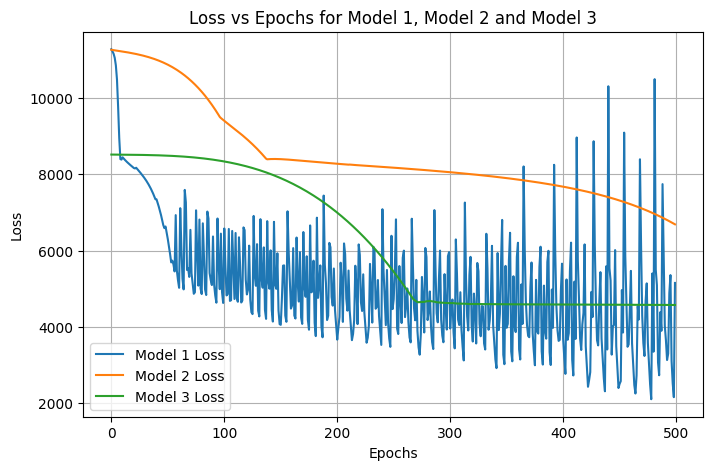

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history_model1.history['loss'], label='Model 1 Loss')
plt.plot(history_model2.history['loss'], label='Model 2 Loss')
plt.plot(history_model3.history['loss'], label='Model 3 Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Model 1, Model 2 and Model 3")
plt.legend()
plt.grid()
plt.show()